# **Customer Behavior Analysis**

---
This notebook presents a comprehensive analysis of customer behavior based on the transactional data collected from ten stores for three months. The notebook guides you through the Exploratory Data Analysis of the dataset and derives valuable insights from it 


### **Problem Statement :** 
Develop a data analysis project that focuses on understanding and analyzing customer behavior based on transactional data. The goal is to perform Exploratory Data Analysis (EDA) to derive valuable insights into customer preferences, purchasing patterns, and overall behavior.

### **Dataset Description :** 
The dataset is take from kaggle.com. Below is the link for the dataset

[https://www.kaggle.com/datasets/iamprateek/store-transaction-data](https://www.kaggle.com/datasets/iamprateek/store-transaction-data)

It contains five csv files : 

**Hackathon_ Ideal_Data** - The file contains brand level data for 10 stores for the last 3 months. This can be referred to as the ideal data.

**Hackathon_Working_Data** - This contains data for selected stores which are missing and/or incomplete.

**Hackathon_Mapping_File** - This file is provided to help understand the column names in the data set.

**Hackathon_Validation_Data** - This file contains the data stores and product groups for which you have to predict the Total_VALUE.

**Sample Submission** - This file represents what needs to be uploaded as output by candidate in the same format. The sample data is provided in the file to help understand the columns and values required.

This notebook uses the Hackathon_Working_Data.csv for the analysis purpose as it contains the most number of samples out of all

The Hackathon_Mapping_File.csv has the attributes definitions for the Hackathon_Working_Data.csv as given below

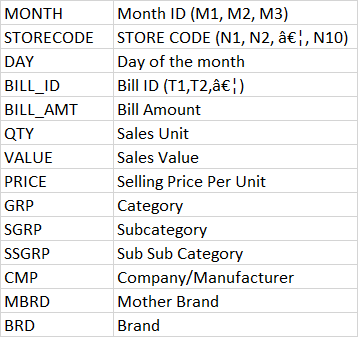

### **Key Steps:**

**Data Preprocessing:** In this step we preprocess the data to make it ready for the key step that Exploratory Data Analysis. This step contains some operation like taking care of the missing data, duplicate data, dropping irrelevent columns etc.

**Exploratory Data Analysis (EDA)**: Then comes the main step of this notebook, exploratory data analysis, to gain insights into the dataset's characteristics, including data visualization and statistical summaries. This step helps understand the distribution of features, identify correlations, and detect potential patterns.

---

### **Importing libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
mapping_file = pd.read_csv('datasets/Hackathon_Mapping_File.csv')

In [3]:
mapping_file

,File Name,Column Name,Column Description
0,Hackathon_Ideal_Data,MONTH,"Month ID (M1, M2, M3)"
1,NaN,STORECODE,"STORE CODE (P1, P2, …, P10)"
2,NaN,QTY,Sales Unit
3,NaN,VALUE,Sales Value
4,NaN,GRP,Category
5,NaN,SGRP,Subcategory
6,NaN,SSGRP,Sub Sub Category
7,NaN,CMP,Company/Manufacturer
8,NaN,MBRD,Mother Brand
9,NaN,BRD,Brand


In [4]:
ideal_data = pd.read_csv('datasets/Hackathon_Ideal_Data.csv')

In [5]:
ideal_data.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [6]:
working_data = pd.read_csv('datasets/Hackathon_Working_Data.csv')

In [7]:
working_data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [8]:
working_data.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [9]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


# **Data Preprocessing**

In [10]:
bill = 'T400'
bill_df = working_data[working_data['BILL_ID'] == bill]

In [11]:
bill_df.head(8)

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
18,M1,N1,4,T400,40.00,10.0,30.0,3.0,PRE-POST WASH PRODUCTS,FABRIC SOFTNERS,FABRIC SOFTNERS,HINDUSTAN UNILEVER LIMITED,COMFORT,COMFORT BLUE - MORNING FRESH
19,M1,N1,4,T400,40.00,1.0,10.0,10.0,MILK POWDERS,DAIRY WHITNERS,DAIRY WHITNERS,NESTLE INDIA,EVERYDAY,EVERYDAY DAIRY WHITNER
2835,M1,N2,16,T400,2330.00,2.0,570.0,285.0,COFFEE,INSTANT COFFEE,INSTANT COFFEE,NESTLE INDIA,NESCAFE,NESCAFE CLASSIC
2836,M1,N2,16,T400,2330.00,8.0,1760.0,220.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,HASMUKHRAI & CO,SOCIETY,SOCIETY LEAF
3310,M1,N3,17,T400,81.00,1.0,30.0,30.0,CHOCOLATE,MOULDED,MOULDED,MONDELEZ INTERNATIONAL,CADBURY DAIRY MILK,DAIRY MILK CRISPELLO
3311,M1,N3,17,T400,81.00,1.0,51.0,51.0,TOILET SOAPS (04/00),PREMIUM,PREMIUM,RECKITT BENCKISER,DETTOL,DETTOL COOL
4529,M1,N4,30,T400,562.16,30.0,285.0,9.5,WASHING POWDERS/LIQUIDS,WASHING POWDERS/LIQUIDS,WASHING POWDERS/LIQUIDS,HINDUSTAN UNILEVER LIMITED,WHEEL,WHEEL ACTIVE
4530,M1,N4,30,T400,562.16,1.0,47.0,47.0,TOOTH PASTES,TOOTH PASTES,TOOTH PASTES,COLGATE-PALMOLIVE,COLGATE DENTALCREAM,COLGATE DENTALCREAM


We can see by this table that the same BILL_ID are used by multiple store, so to generate a unique ID for each customer we will combine the STORECODE and BILL_ID column

In [12]:
working_data['UID'] = working_data['STORECODE'] + working_data['BILL_ID']

In [13]:
working_data.head(5)

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UID
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1T375
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1T379
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1T381
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1T382
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1T384


### **Taking care of the missing data**

In [14]:
missing_values = working_data.isnull().sum()
print(missing_values)

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
UID          0
dtype: int64


As we can see there is no missing value

### **Taking care of the duplicated values**

In [15]:
working_data.duplicated().sum()

90

In [16]:
working_data.drop_duplicates(inplace=True)

# **Performing Exploratory Data Analysis (EDA)**

We will be performing EDA on the categorical and numerical columns separately

### **Categorical Features**

Here are the categorical features present in the dataset

In [17]:
categorical_columns = [feature for feature in working_data.columns if (working_data[feature].dtypes == 'O')]

In [18]:
categorical_columns

['MONTH',
 'STORECODE',
 'BILL_ID',
 'GRP',
 'SGRP',
 'SSGRP',
 'CMP',
 'MBRD',
 'BRD',
 'UID']

In [19]:
working_data['GRP'].value_counts().head()

GRP
BISCUITS - CORE & NON CORE    6646
SALTY SNACKS (2/97)           1713
CHOCOLATE                     1407
SPICES (03/04)                1347
VERMICELLI & NOODLE           1327
Name: count, dtype: int64

Here is the frequency distributions of some of the categorical features

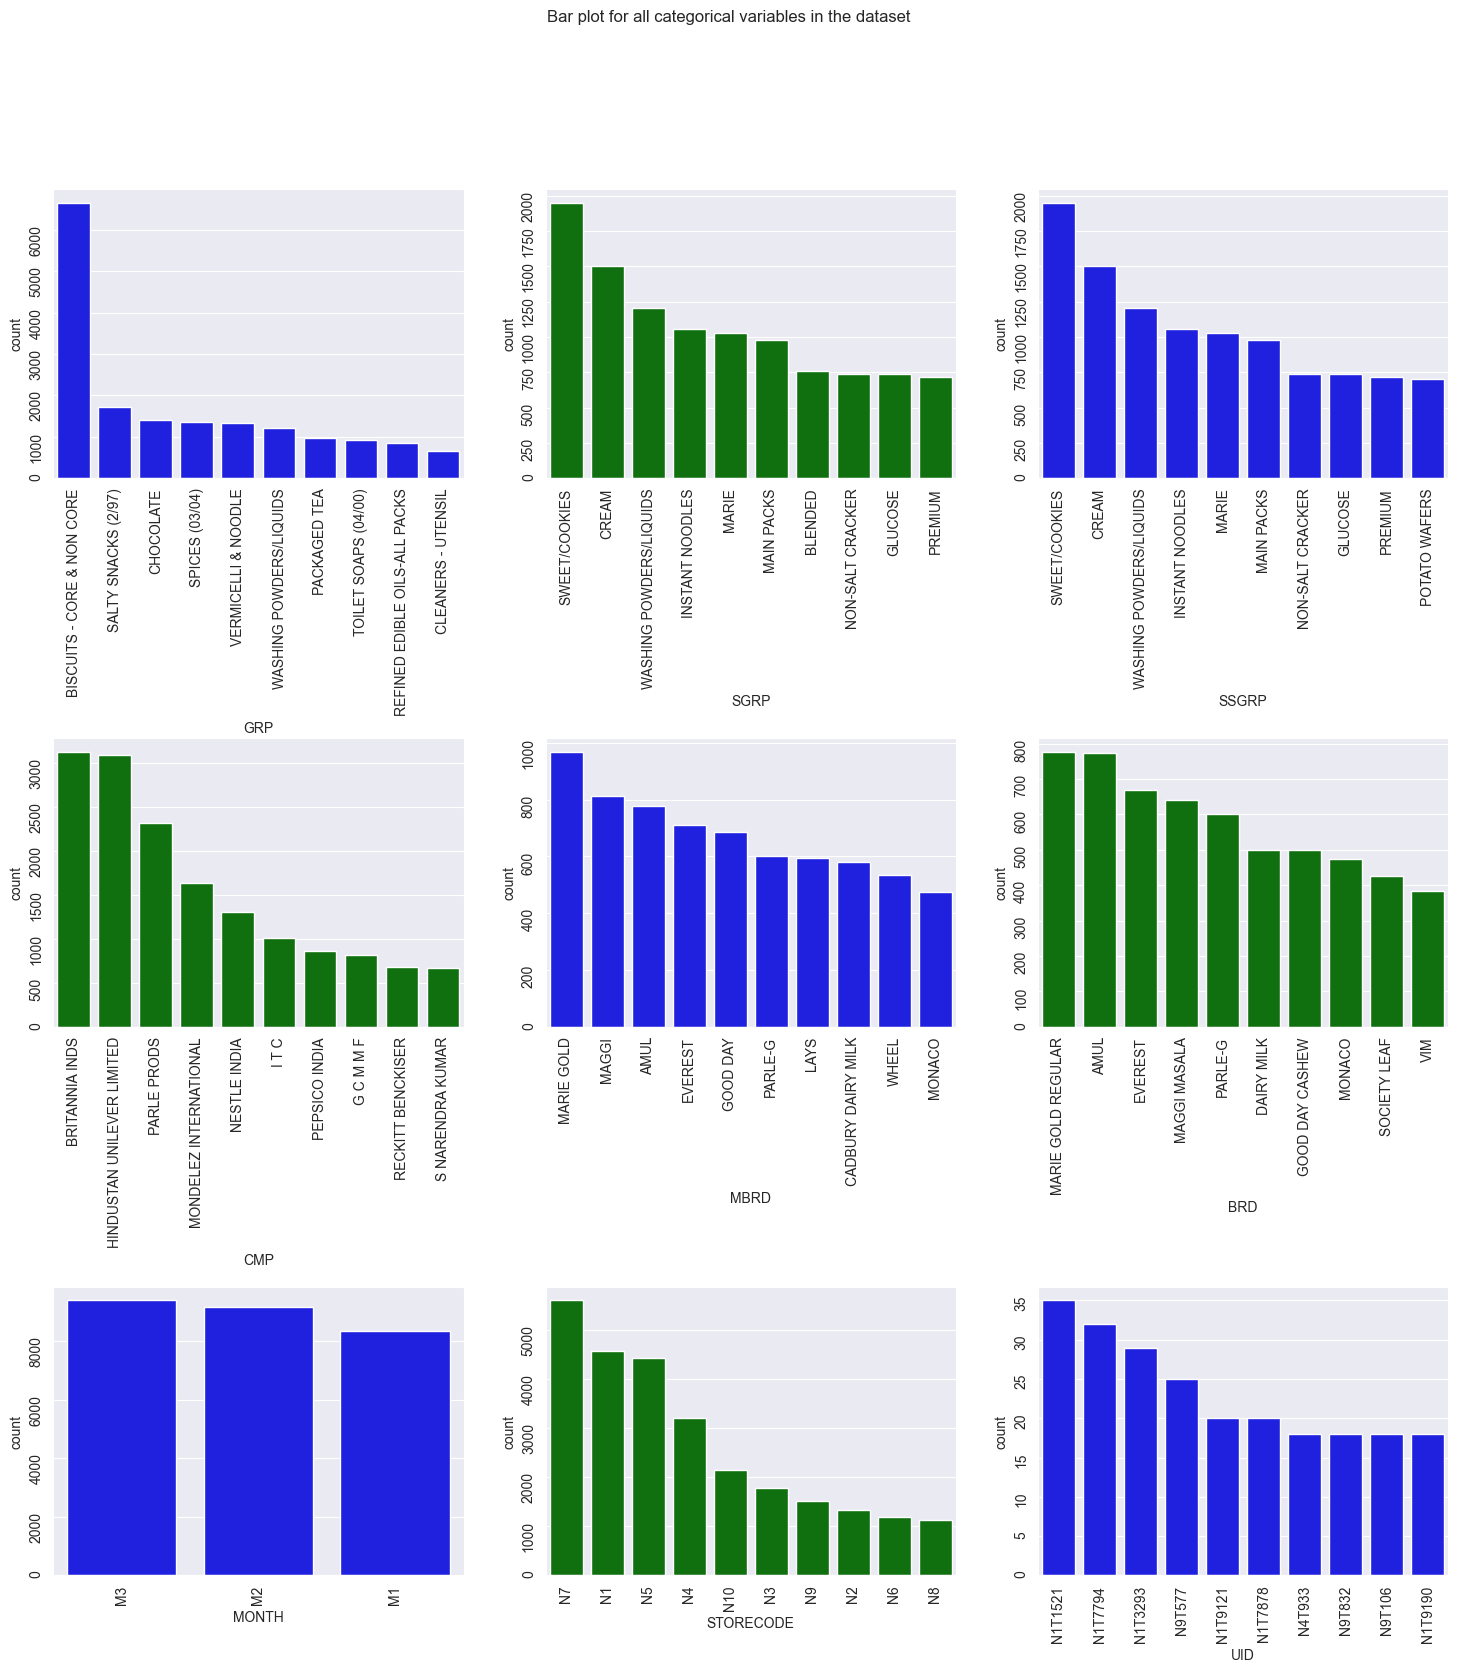

In [20]:
fig, axes = plt.subplots(3, 3, figsize = (18, 18),gridspec_kw={'hspace': 0.9})
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'GRP', data = working_data, color = 'blue', 
              order = working_data['GRP'].value_counts().head(10).index);
sns.countplot(ax = axes[0, 1], x = 'SGRP', data = working_data, color = 'green', 
              order = working_data['SGRP'].value_counts().head(10).index);
sns.countplot(ax = axes[0, 2], x = 'SSGRP', data = working_data, color = 'blue', 
              order = working_data['SSGRP'].value_counts().head(10).index);
sns.countplot(ax = axes[1, 0], x = 'CMP', data = working_data, color = 'green', 
              order = working_data['CMP'].value_counts().head(10).index);
sns.countplot(ax = axes[1, 1], x = 'MBRD', data = working_data, color = 'blue', 
              order = working_data['MBRD'].value_counts().head(10).index);
sns.countplot(ax = axes[1, 2], x = 'BRD', data = working_data, color = 'green', 
              order = working_data['BRD'].value_counts().head(10).index);
sns.countplot(ax = axes[2, 0], x = 'MONTH', data = working_data, color = 'blue', 
              order = working_data['MONTH'].value_counts().head(10).index);
sns.countplot(ax = axes[2, 1], x = 'STORECODE', data = working_data, color = 'green', 
              order = working_data['STORECODE'].value_counts().head(10).index);
sns.countplot(ax = axes[2, 2], x = 'UID', data = working_data, color = 'blue', 
              order = working_data['UID'].value_counts().head(10).index);
for ax in axes.flatten():
    ax.tick_params(labelrotation=90)
plt.show()

#### **Insights :**

1 . As we can see,Biscuits are by far the most bought item from the stores in this dataset, followed by salty snacks, chocolates, spices, noodles, washing powder / liquid  etc

2 . In biscuits, particularly Sweets/Cookies are the most sold things, followed by creame, instant noodles etc

3 . Because the biscuits are the most sold things, the company whose product are sold the most is Britannia, followed by Hindustan Unilever, Parle, Mondelez, Nestle, ITC, Pepsico etc. 

4 . A particular brand that is sold the most is Marie Gold of Britannia company, followed by Maggi of Nestle, Everest, Good Day, Parle G

5 . All the three months for which the data is collected have almost the same selling frequency

6 . The store with 'N7' as a label is the most frequently visited store

### **Numerical Features**

In [21]:
numerical_features = [feature for feature in working_data.columns if (working_data[feature].dtypes != 'O')]

In [22]:
numerical_features

['DAY', 'BILL_AMT', 'QTY', 'VALUE', 'PRICE']

#### **Total and Average Sales of all the stores**

In [23]:
total_sales = working_data.groupby('STORECODE')['VALUE'].sum().reset_index().sort_values(by = 'VALUE', ascending=False)

In [24]:
average_sales = working_data.groupby('STORECODE')['VALUE'].mean().reset_index().sort_values(by = 'VALUE', ascending=False)

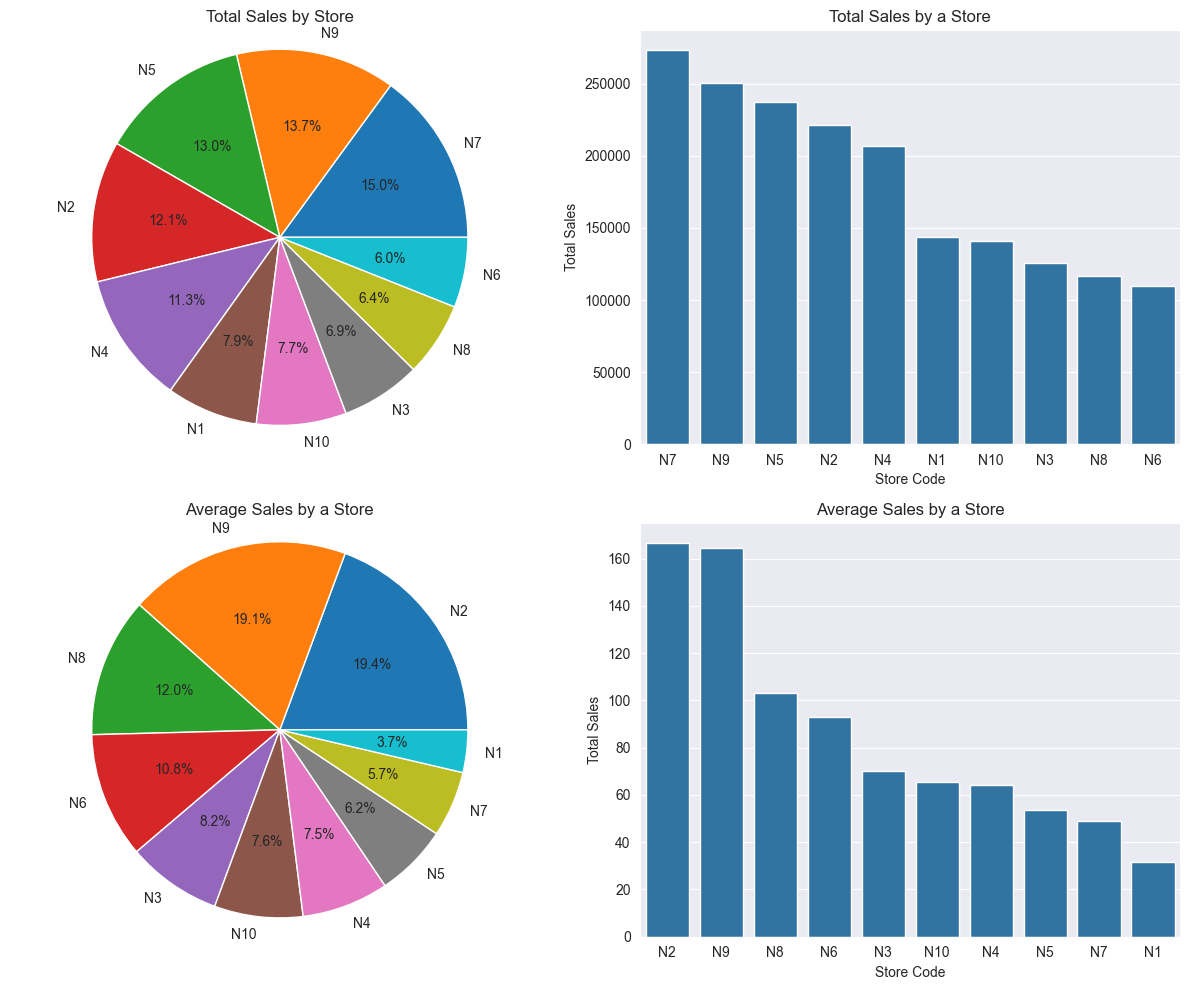

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# Pie chart
axes[0, 0].pie(total_sales['VALUE'], labels=total_sales['STORECODE'], autopct='%1.1f%%')
axes[0, 0].set_title('Total Sales by Store')
axes[0, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=total_sales, ax=axes[0, 1])
axes[0, 1].set_title('Total Sales by a Store')
axes[0, 1].set_xlabel('Store Code')
axes[0, 1].set_ylabel('Total Sales')
# Pie chart
axes[1, 0].pie(average_sales['VALUE'], labels=average_sales['STORECODE'], autopct='%1.1f%%')
axes[1, 0].set_title('Average Sales by a Store')
axes[1, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=average_sales, ax=axes[1, 1])
axes[1, 1].set_title('Average Sales by a Store')
axes[1, 1].set_xlabel('Store Code')
axes[1, 1].set_ylabel('Total Sales')
plt.tight_layout()
plt.show()

#### **Insights :**
1 . We can see that N7 has the most sales made by any of the stores

2 . N2 store has the highest average sell of any stores, that means they sell less products but the products sold are of high price

#### **Total products sold by a store :**

In [26]:
total_products = working_data.groupby('STORECODE')['QTY'].sum().reset_index().sort_values(by = 'QTY', ascending=False)

In [27]:
total_products

,STORECODE,QTY
0,N1,40499.0
2,N2,23782.0
7,N7,17867.0
4,N4,7906.0
5,N5,7131.0
1,N10,3568.0
3,N3,2869.0
9,N9,2611.0
8,N8,2507.0
6,N6,1929.0


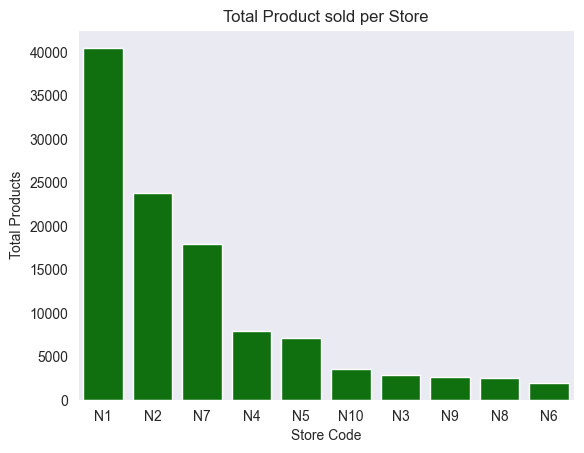

In [28]:
sns.barplot( x='STORECODE', y='QTY',data=total_products, color='green')
plt.title('Total Product sold per Store')
plt.xlabel('Store Code')
plt.ylabel('Total Products')
plt.grid(axis='y')
plt.show()

#### **Comparing number of product sold with the sales made**

In [29]:
combined_data = pd.merge(total_sales, total_products, on='STORECODE').set_index('STORECODE').reset_index()

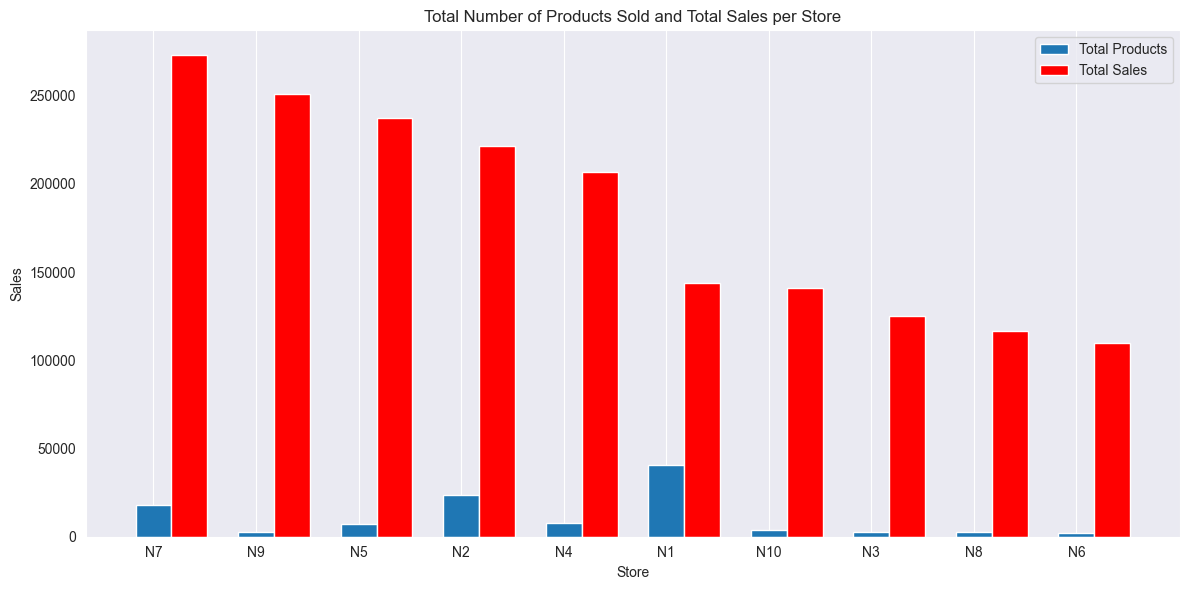

In [30]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(combined_data))
bar1 = plt.bar(x, combined_data['QTY'], bar_width, label='Total Products')
bar2 = plt.bar(combined_data.index + bar_width, combined_data['VALUE'], bar_width, label='Total Sales', color='red')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Total Number of Products Sold and Total Sales per Store')
plt.xticks(x,combined_data['STORECODE'])
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

## **Most bought products in each store**

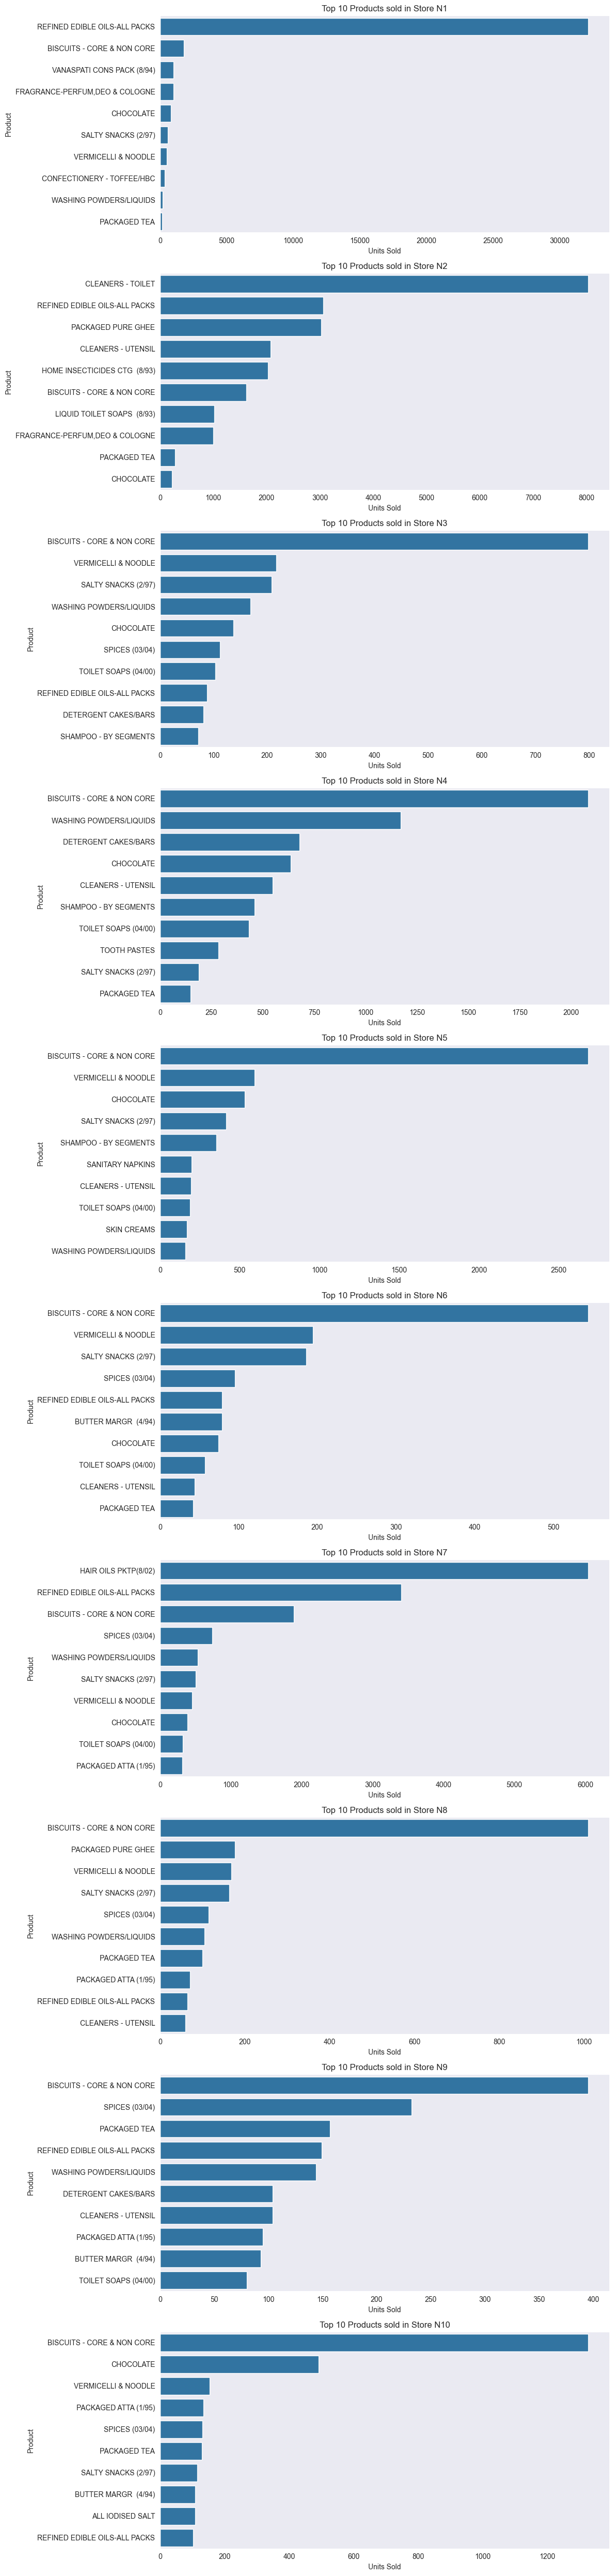

In [31]:
stores = working_data['STORECODE'].unique()

plt.figure(figsize=(12, 50))

for i, store in enumerate(stores, 1):
    store_data = working_data[working_data['STORECODE'] == store]
    most_bought_prod = store_data.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
    plt.subplot(10, 1, i)
    sns.barplot(x='QTY', y='GRP', data=most_bought_prod[:10])
    plt.grid(axis='x')
    plt.xlabel('Units Sold')
    plt.ylabel('Product')
    plt.title(f"Top 10 Products sold in Store {store}")
plt.tight_layout()
plt.show()

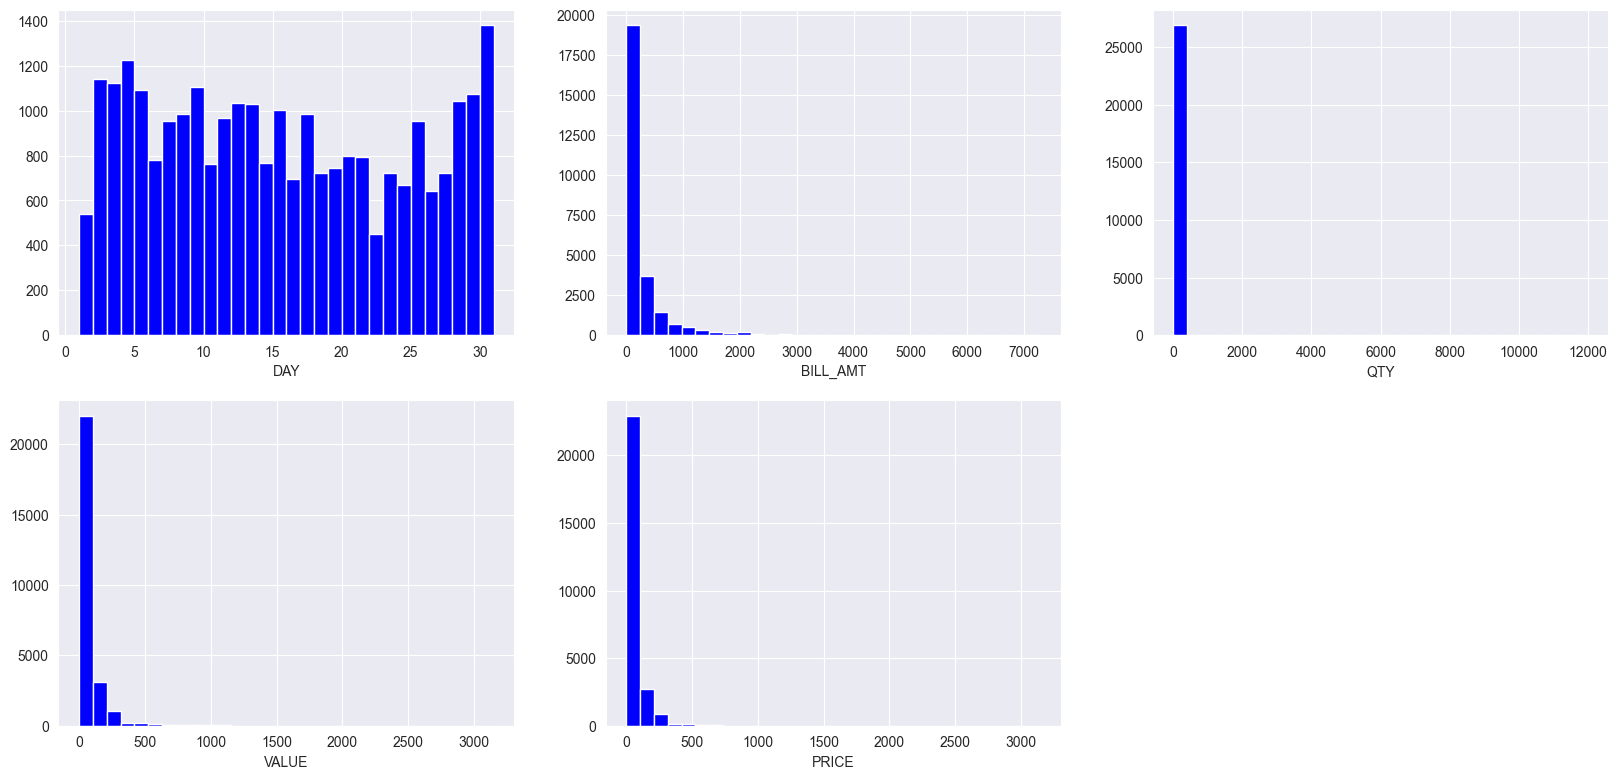

In [32]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    plt.hist(working_data[numerical_feature], bins=30, color='blue', stacked = True)
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Plotting the Correlation matrix


<Axes: >

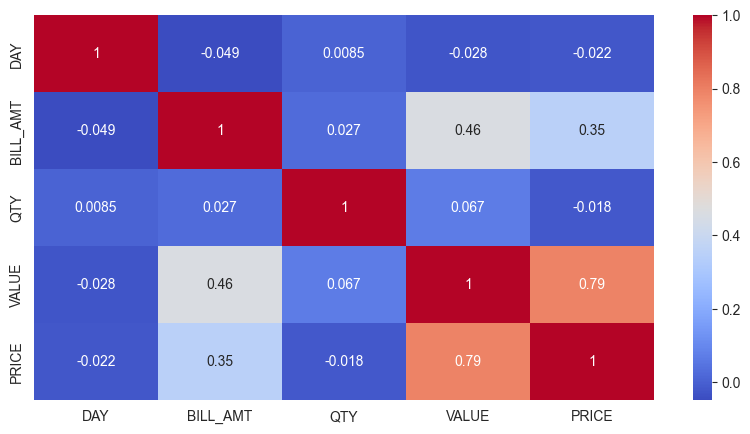

In [33]:
df2 = working_data[numerical_features]
cor_mat=df2.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(cor_mat,annot=True,cmap="coolwarm")

There is not much to gain from this

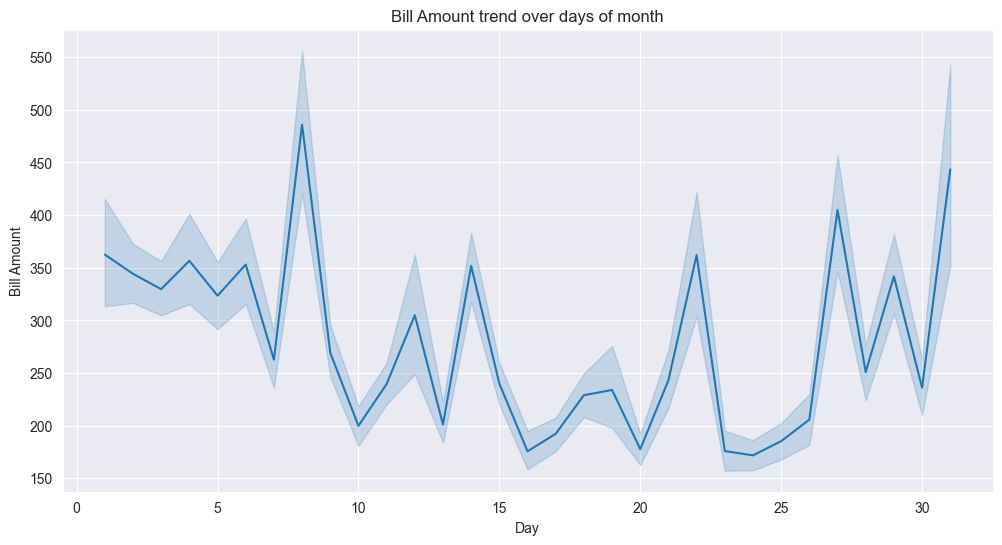

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=working_data, x='DAY', y='BILL_AMT')
plt.title('Bill Amount trend over days of month')
plt.xlabel('Day')
plt.ylabel('Bill Amount')
plt.show()

We can see that there not much of trend the days

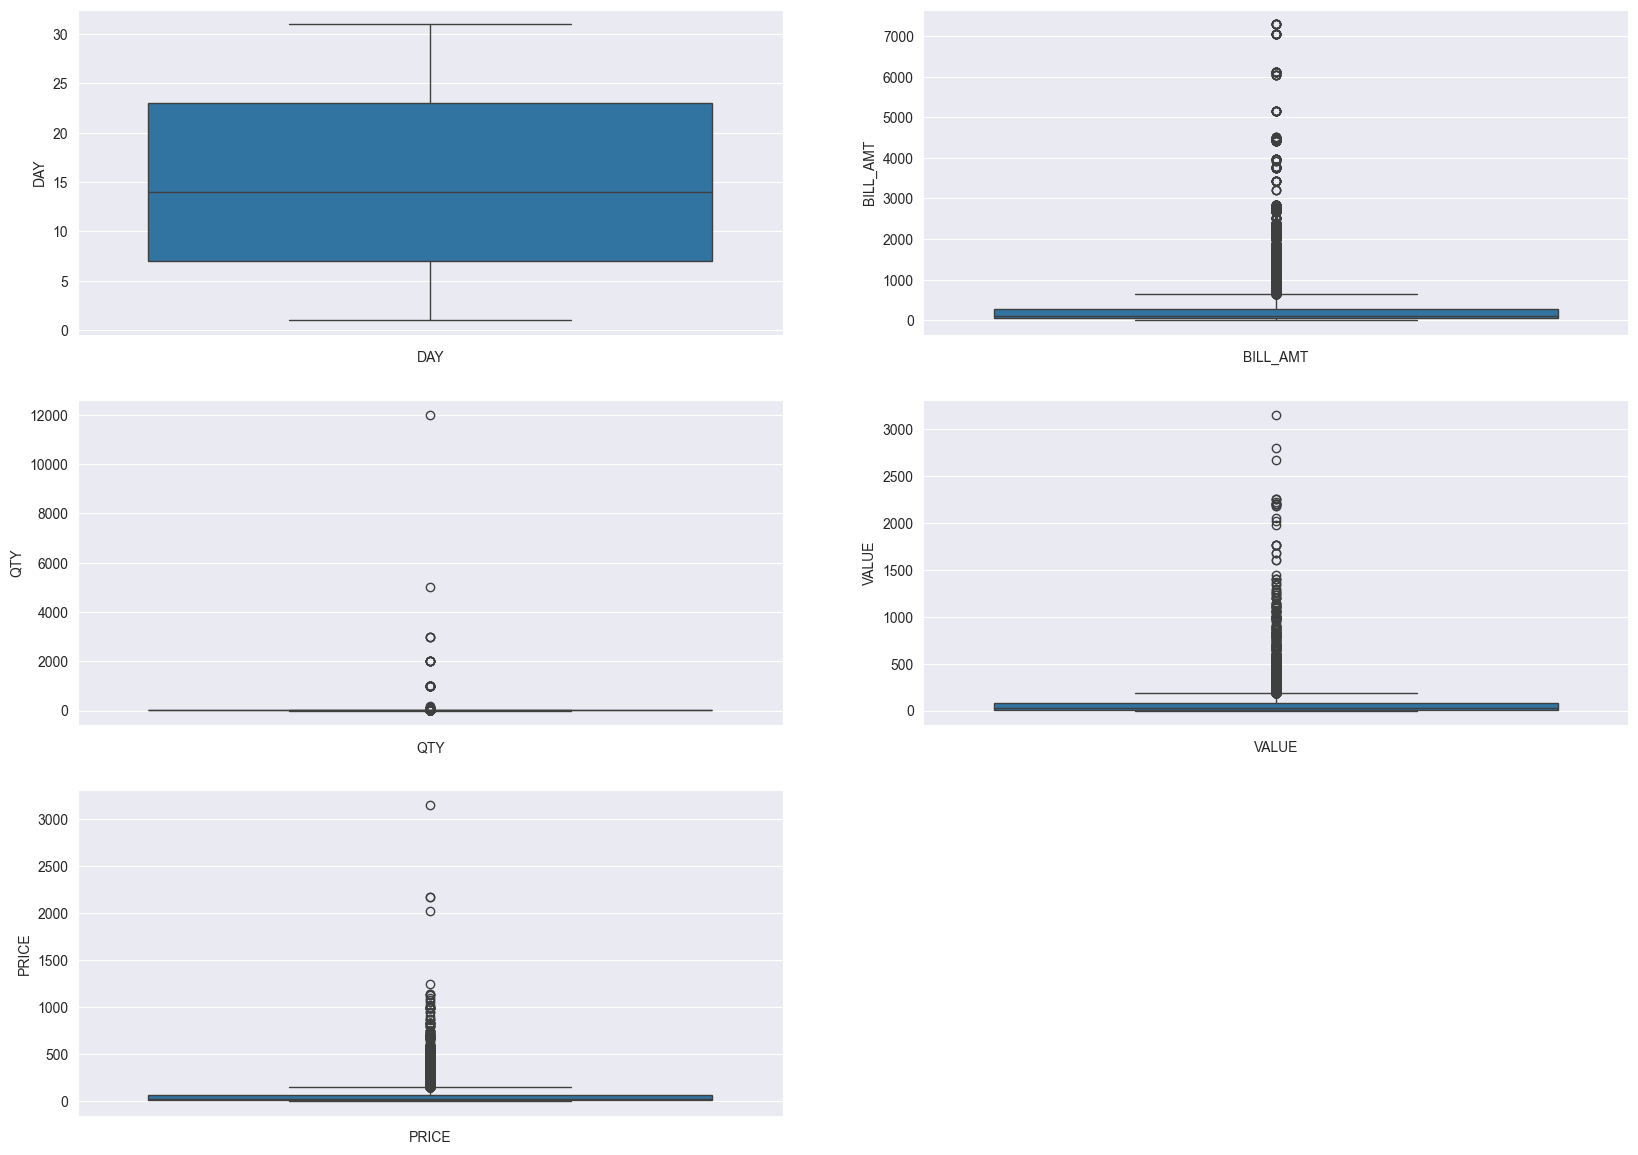

In [35]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.boxplot(working_data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

# **Conclusion**

In this project, we conducted a comprehensive analysis of customer behavior based on transactional data from ten stores. Through exploratory data analysis (EDA), we gained valuable insights into customer preferences, purchasing patterns, and overall behavior.